Servo Prediction using Linear Regression

Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

Import Dataset

In [3]:
Mg=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [4]:
Mg.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [5]:
Mg

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6
...,...,...,...,...,...
162,B,C,3,2,44
163,B,E,3,1,40
164,C,D,4,3,25
165,A,B,3,2,44


In [6]:
Mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [7]:
Mg.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [8]:
Mg.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [9]:
Mg.shape

(167, 5)

In [10]:
Mg[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [11]:
Mg[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

Get Encoding of Categorical Features

In [12]:
Mg.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4 }},inplace=True)

In [13]:
Mg.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}}, inplace=True)

Define Y(dependent or label or target variable) and X(independent or features or attribute variable)

In [14]:
Y=Mg['Class']

In [15]:
Y.shape

(167,)

In [16]:
Y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [17]:
X=Mg[['Motor','Screw','Pgain','Vgain']]

In [18]:
X.shape

(167, 4)

In [19]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


Get Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3, random_state=2529)

In [22]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((116, 4), (51, 4), (116,), (51,))

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
lr=LinearRegression()

In [36]:
lr.fit(X_train,Y_train)

LinearRegression()

Get Model Prediction

In [37]:
Y_pred=lr.predict(X_test)

In [38]:
Y_pred.shape

(51,)

In [39]:
Y_pred

array([24.55945258, 30.98765106, 18.54485477, 25.51524243, 38.56082023,
       23.52007775, 11.61947065, 20.03335614, 40.60404401, 41.7009556 ,
       13.66269443, 26.01242807, 16.50163099, 16.54663453, 21.92598051,
       22.52570646, -5.46449561, 30.68912392, 32.7323477 ,  1.41282941,
       33.97718702, 31.63543611, 33.52806048, 30.04133887, 19.38557109,
        6.49364826, 28.5528375 , 17.04382017, 25.06611589,  3.50411229,
       30.59606128, 23.67067716, 35.72188367, 32.08456265, 12.46018697,
        3.6547117 , 23.47201865, 33.03087484, 17.49294672, 37.61450804,
       27.54898855, 22.07657992, 11.51387478,  9.470651  , 30.53852451,
       28.64590014, 33.67865989,  4.60102388, 24.1198037 , 21.13026773,
       25.71390094])

Get Model Evaluation

In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [41]:
mean_squared_error(Y_test,Y_pred)

66.03589175595563

In [42]:
mean_absolute_error(Y_test,Y_pred)

7.190539677251235

In [44]:
r2_score(Y_test,Y_pred)

0.6807245170563927

Get Visualization of Actual Vs Predicted Result

In [45]:
import matplotlib.pyplot as plt

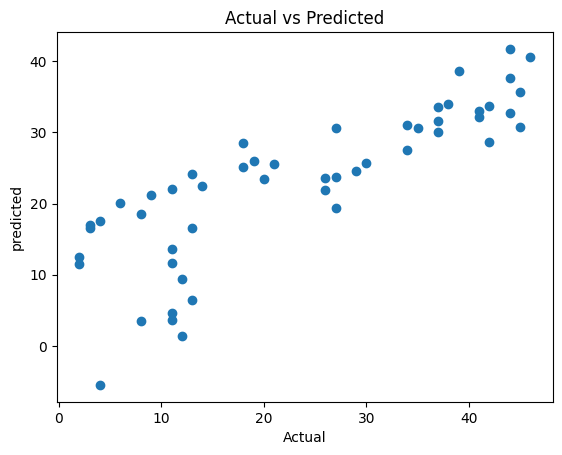

In [50]:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title ('Actual vs Predicted')
plt.show()

Get Future Prediction

In [51]:
X_new=Mg.sample(1)

In [52]:
X_new

,Motor,Screw,Pgain,Vgain,Class
81,0,2,6,5,11


In [53]:
X_new.shape

(1, 5)

In [54]:
X_new=X_new.drop('Class',axis=1)

In [55]:
X_new

,Motor,Screw,Pgain,Vgain
81,0,2,6,5


In [58]:
Y_pred_new=lr.predict(X_new)

In [59]:
Y_pred_new

array([8.68747144])